In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [26]:
my_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359469.csv', sep=',', index_col=False, skiprows=61)
mq_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359466.csv', sep=',', index_col=False, skiprows=61)

In [27]:
print("number of unique peptide sequences: mq {}, mine {}".format(mq_results_df.pep_seq.nunique(), my_results_df.pep_seq.nunique()))

number of unique peptide sequences: mq 221, mine 777


In [45]:
my_results_df.columns

Index(['prot_hit_num', 'prot_family_member', 'prot_acc', 'prot_desc',
       'prot_score', 'prot_mass', 'prot_matches', 'prot_matches_sig',
       'prot_sequences', 'prot_sequences_sig', 'pep_query', 'pep_rank',
       'pep_isbold', 'pep_isunique', 'pep_exp_mz', 'pep_exp_mr', 'pep_exp_z',
       'pep_calc_mr', 'pep_delta', 'pep_miss', 'pep_score', 'pep_expect',
       'pep_res_before', 'pep_seq', 'pep_res_after', 'pep_var_mod',
       'pep_var_mod_pos', 'pep_summed_mod_pos', 'pep_scan_title'],
      dtype='object')

In [46]:
my_results_df.head()

,prot_hit_num,prot_family_member,prot_acc,prot_desc,prot_score,prot_mass,prot_matches,prot_matches_sig,prot_sequences,prot_sequences_sig,...,pep_miss,pep_score,pep_expect,pep_res_before,pep_seq,pep_res_after,pep_var_mod,pep_var_mod_pos,pep_summed_mod_pos,pep_scan_title
0,1,1.0,2::PTPRA_HUMAN,Receptor-type tyrosine-protein phosphatase alp...,84,91574,6,6,1,1,...,1,37.23,0.0017,R,LINSSTAEPVKEEAK,T,NaN,NaN,NaN,RawFile: HeLa_20KInt Charge: 3 FeatureIntensit...
1,1,1.0,2::PTPRA_HUMAN,Receptor-type tyrosine-protein phosphatase alp...,84,91574,6,6,1,1,...,1,33.26,0.0047,R,LINSSTAEPVKEEAK,T,NaN,NaN,NaN,RawFile: HeLa_20KInt Charge: 3 FeatureIntensit...
2,1,1.0,2::PTPRA_HUMAN,Receptor-type tyrosine-protein phosphatase alp...,84,91574,6,6,1,1,...,1,31.28,0.0037,R,LINSSTAEPVKEEAK,T,NaN,NaN,NaN,RawFile: HeLa_20KInt Charge: 3 FeatureIntensit...
3,1,1.0,2::PTPRA_HUMAN,Receptor-type tyrosine-protein phosphatase alp...,84,91574,6,6,1,1,...,1,31.25,0.0051,R,LINSSTAEPVKEEAK,T,NaN,NaN,NaN,RawFile: HeLa_20KInt Charge: 3 FeatureIntensit...
4,1,1.0,2::PTPRA_HUMAN,Receptor-type tyrosine-protein phosphatase alp...,84,91574,6,6,1,1,...,1,31.25,0.0100,R,LINSSTAEPVKEEAK,T,NaN,NaN,NaN,RawFile: HeLa_20KInt Charge: 3 FeatureIntensit...


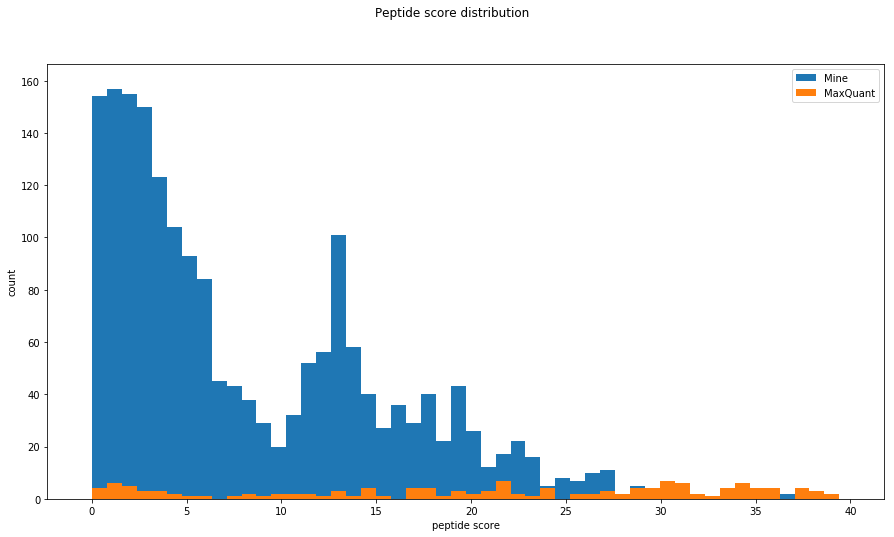

In [30]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Peptide score distribution')

bins = 50
hist, bins, _ = plt.hist(my_results_df.pep_score, bins=bins, label='Mine')
hist, bins, _ = plt.hist(mq_results_df.pep_score, bins=bins, label='MaxQuant')
plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('count')

plt.show()

In [32]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

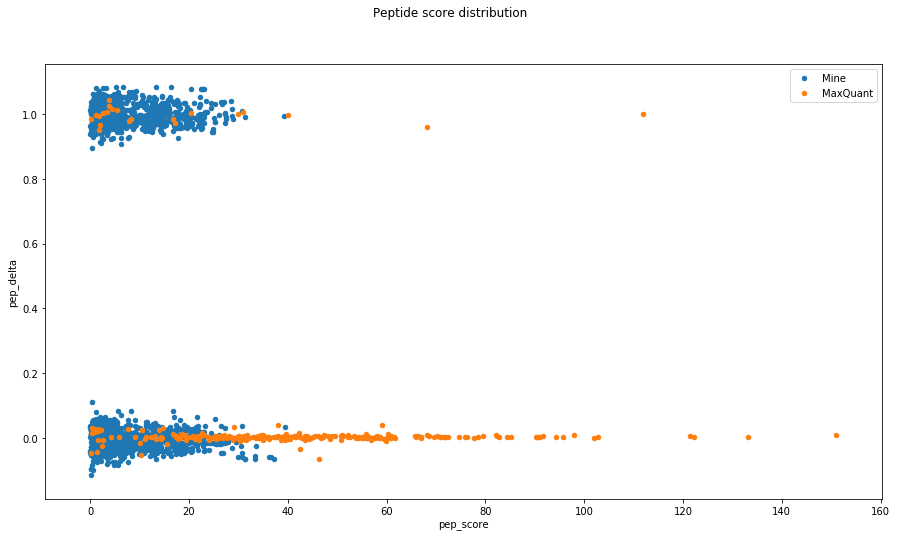

In [44]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Peptide score distribution')

ax.scatter(my_results_df.pep_score, my_results_df.pep_delta, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")
ax.scatter(mq_results_df.pep_score, mq_results_df.pep_delta, marker='o', color=tableau20_mpl[2], lw=0, s=30, alpha=1.0, label="MaxQuant")

plt.legend(loc='best')
plt.xlabel('pep_score')
plt.ylabel('pep_delta (Da)')

plt.show()

In [52]:
# number of peptide matches
my_peptides = list(my_results_df.pep_seq.unique())
mq_peptides = list(mq_results_df.pep_seq.unique())

In [56]:
set(mq_peptides).intersection(my_peptides)

{'EIYPGQFQPSLCHK'}